In [1]:
import networkx as nx
import networkx.algorithms.community as nx_comm

from utilities import import_networks

from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import lukes_partitioning

import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm

In [2]:
networks = import_networks()

print("\n".join([str(x) for x in networks]))

Graph with 1001 nodes and 75862 edges
Graph with 999 nodes and 75415 edges
Graph with 1025 nodes and 80306 edges
Graph with 1018 nodes and 80077 edges


# Modularity network classification

In [3]:
from networkx.algorithms.community import greedy_modularity_communities

In [104]:
%%time
# Obtain modularity communities
resolution = 0.5
modularity_communities = [list(greedy_modularity_communities(g,weight='weight',resolution = resolution)) for g in networks]
for comm in modularity_communities:
    print(f"{len(comm)} communities: {[len(x) for x in comm]}")

4 communities: [470, 430, 76, 25]
4 communities: [444, 242, 232, 81]
5 communities: [385, 288, 249, 80, 23]
5 communities: [375, 283, 254, 82, 24]
CPU times: user 35.7 s, sys: 6.52 ms, total: 35.7 s
Wall time: 35.8 s


In [68]:
#Modularity scores:
modularity_scores = [nx_comm.modularity(g,comm) for g,comm in zip(networks,modularity_communities)]
print(modularity_scores)

partition_quality = [nx_comm.partition_quality(g,comm) for g,comm in zip(networks,modularity_communities)]
print(partition_quality)

[0.4517191605016122, 0.44569503635666974, 0.46531411757736324, 0.475964179800532]
[(0.14739922490838628, 0.8629610389610389), (0.148630908970364, 0.86180168144096), (0.14429805992080294, 0.8610442073170732), (0.15317756659215506, 0.859911948737861)]


## Test resolution parameter

In [10]:
# Obtain modularity communities
def get_modullarity_communities(G:nx.Graph,resolution=1,result = None,year = None):
    modularity_communities = [list(greedy_modularity_communities(g,weight='weight',resolution = r)) for r in resolution] 
    if result is not None:
        result[year] = modularity_communities
    return(modularity_communities)

In [108]:
%%time
communities_by_resolution =  {}
resulutions = np.arange(0,1,0.1)
resolutions = np.append(np.arange(0,1,0.2),np.arange(1,25,0.5))
print(resolutions)
for g,year in zip(networks,range(2018,2022)):
    communities_by_resolution[year] = [[list(x) for x in y] for y in get_modullarity_communities(g,resolution=resolutions)]

[ 0.   0.2  0.4  0.6  0.8  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.
  5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.
 12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.
 19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5]
CPU times: user 18min 13s, sys: 150 ms, total: 18min 13s
Wall time: 25min 31s


In [109]:
communities_statistics = {}
for (year,comms),g in  zip(communities_by_resolution.items(),networks):
    communities_statistics[year] = {"N_communities": [len(x) for x in comms ],
                                    "Avg_comm_size": [np.average([len(y) for y in x]) for x in comms],
                                    "Sigma_comm_size": [np.std([len(y) for y in x]) for x in comms],
                                    "Median_comm_size": [np.median([len(y) for y in x]) for x in comms],
                                    "Modularity_score": [nx_comm.modularity(g,c) for c in comms]}
                                
    
communities_statistics

{2018: {'N_communities': [1,
   2,
   4,
   6,
   6,
   7,
   10,
   12,
   13,
   19,
   22,
   28,
   33,
   35,
   40,
   44,
   47,
   53,
   53,
   60,
   64,
   70,
   76,
   80,
   82,
   83,
   90,
   92,
   96,
   100,
   106,
   110,
   111,
   118,
   120,
   126,
   127,
   136,
   142,
   146,
   152,
   158,
   158,
   167,
   168,
   173,
   177,
   183,
   187,
   195,
   203,
   211,
   214],
  'Avg_comm_size': [1001.0,
   500.5,
   250.25,
   166.83333333333334,
   166.83333333333334,
   143.0,
   100.1,
   83.41666666666667,
   77.0,
   52.68421052631579,
   45.5,
   35.75,
   30.333333333333332,
   28.6,
   25.025,
   22.75,
   21.29787234042553,
   18.88679245283019,
   18.88679245283019,
   16.683333333333334,
   15.640625,
   14.3,
   13.171052631578947,
   12.5125,
   12.207317073170731,
   12.060240963855422,
   11.122222222222222,
   10.880434782608695,
   10.427083333333334,
   10.01,
   9.443396226415095,
   9.1,
   9.018018018018019,
   8.483050847457626,
 

In [111]:
# Export Data
import json
with open("data/modularity_communities.json", "w") as f:
    json.dump(communities_by_resolution,f)
with open("data/modularity_communities_statistics.json", "w") as f:
    json.dump(communities_statistics,f)

In [10]:
#Import data
import json
with open("data/modularity_communities_statistics.json", "r") as f:
    communities_statistics = json.load(f)
with open("data/modularity_communities.json", "r") as f:
    communities_by_resolution = json.load(f)

resolutions = np.append(np.arange(0,1,0.2),np.arange(1,25,0.5))

No handles with labels found to put in legend.


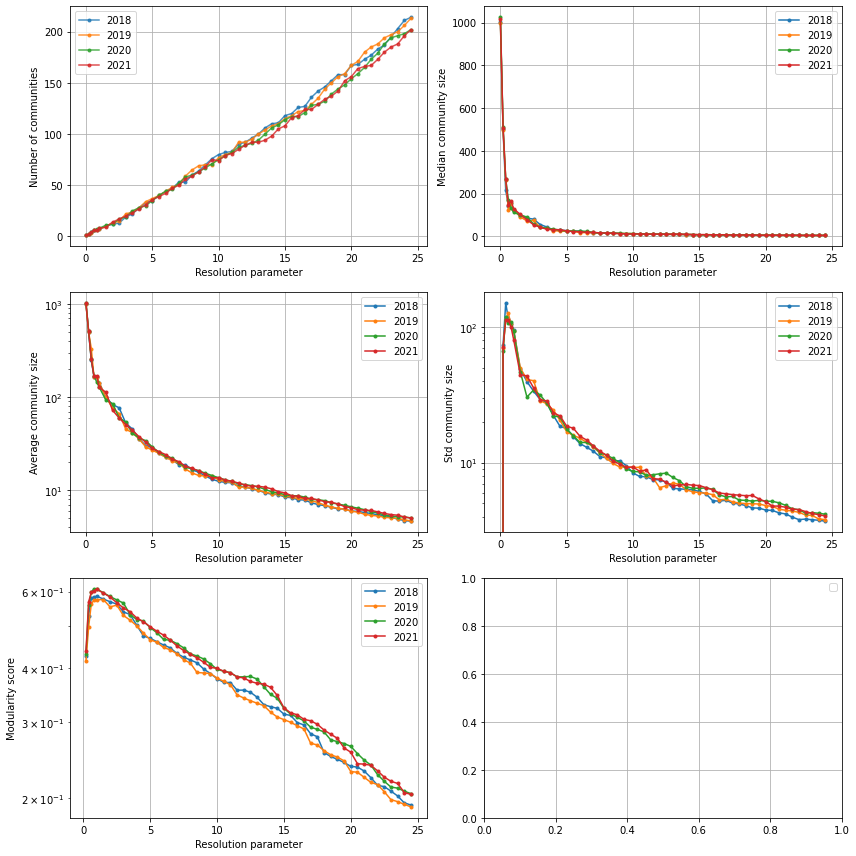

In [6]:
fig,ax = plt.subplots(ncols=2,nrows=3,figsize=(12,12))
ax[0,0].set(xlabel="Resolution parameter", ylabel="Number of communities")
ax[0,1].set(xlabel="Resolution parameter", ylabel="Median community size")
ax[1,0].set(xlabel="Resolution parameter", ylabel="Average community size",yscale="log")
ax[1,1].set(xlabel="Resolution parameter", ylabel="Std community size",yscale="log")
ax[2,0].set(xlabel="Resolution parameter", ylabel="Modularity score",yscale="log")
for year, data in communities_statistics.items():
    ax[0,0].plot(resolutions,data["N_communities"],label=year, marker='o', ms=3,alpha=0.8)
    ax[0,1].plot(resolutions,data["Median_comm_size"],label=year, marker='o', ms=3)
    ax[1,0].plot(resolutions,data["Avg_comm_size"],label=year, marker='o', ms=3)
    ax[2,0].plot(resolutions[1:],data["Modularity_score"][1:],label=year, marker='o', ms=3)
    ax[1,1].plot(resolutions,data["Sigma_comm_size"],label=year, marker='o', ms=3)
             

for a in ax:
    for x in a:
        x.grid()
        x.legend()
# ax[0,0].grid()
# ax[0,1].grid()
# ax[0,0].legend()
# ax[0,1].legend()
plt.tight_layout()
plt.savefig("modularity_community_statistics.png",dpi=200)

In [61]:
from scipy.stats import norm

/home/bs/.envs/arc/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


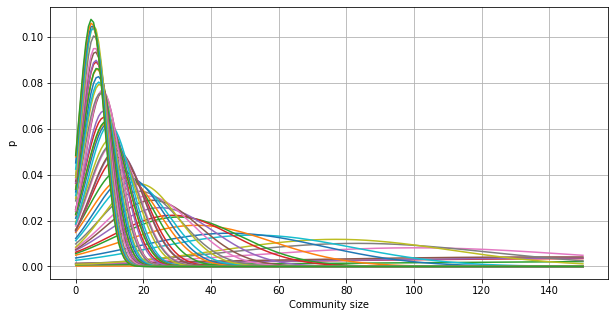

In [116]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set(xlabel="Community size", ylabel="p")

x = np.linspace(0,150,200)
for average,std in zip(communities_statistics[2018]["Avg_comm_size"],communities_statistics[2018]["Sigma_comm_size"]):
    ax.plot(x,norm(loc=average,scale=std).pdf(x),label=year, marker='',ls='-', ms=3)
             
ax.grid()
# ax.legend()

In [102]:
resolutions

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5])

In [39]:
g = networks[1]
comm = [[g.nodes[y]["area"] for y in x] for x in communities_by_resolution["2019"][0]]
areas = []
for a in comm:
    unique = list(set(a))
    areas.append({area: a.count(area) for area in unique})
    # print(a)
print(areas)
print()

[{'Informação e Jornalismo': 19, 'Formação de Professores/Formadores e Ciências da Educação': 28, 'Serviços Sociais': 28, 'Desconhecido ou não especificado': 1, 'Artes': 89, 'Ciências da Vida': 43, 'Agricultura, Silvicultura e Pescas': 17, 'Informática': 23, 'Serviços de Transporte': 3, 'Indústrias Transformadoras': 15, 'Engenharia e Técnicas Afins': 147, 'Arquitetura e Construção': 28, 'Ciências Empresariais': 156, 'Ciências Veterinárias': 10, 'Direito': 22, 'Serviços Pessoais': 66, 'Ciências Físicas': 34, 'Ciências Sociais e do Comportamento': 75, 'Saúde': 100, 'Matemática e Estatística': 17, 'Serviços de Segurança': 1, 'Humanidades': 63, 'Proteção do Ambiente': 14}]



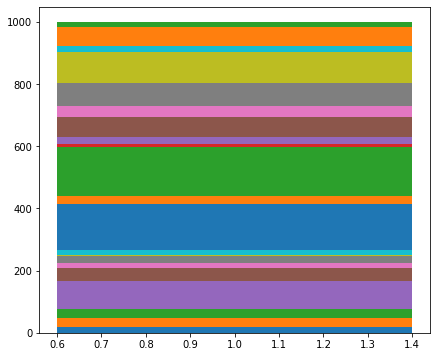

In [40]:
fig,ax = plt.subplots(figsize=(7,6))

y_offset = 0
for i in range(len(areas)):
    y_offset = 0
    for j in range(len(areas[i].values())):
        ax.bar(i+1,list(areas[i].values())[j],bottom=y_offset)
        y_offset += list(areas[i].values())[j]

In [196]:
engs = filter(lambda x: "medicina" in x.lower(), a[1])
print(len([x for x in engs]))

19


In [16]:
communities_statistics["2018"][

{'N_communities': [1,
  2,
  4,
  6,
  6,
  7,
  10,
  12,
  13,
  19,
  22,
  28,
  33,
  35,
  40,
  44,
  47,
  53,
  53,
  60,
  64,
  70,
  76,
  80,
  82,
  83,
  90,
  92,
  96,
  100,
  106,
  110,
  111,
  118,
  120,
  126,
  127,
  136,
  142,
  146,
  152,
  158,
  158,
  167,
  168,
  173,
  177,
  183,
  187,
  195,
  203,
  211,
  214],
 'Avg_comm_size': [1001.0,
  500.5,
  250.25,
  166.83333333333334,
  166.83333333333334,
  143.0,
  100.1,
  83.41666666666667,
  77.0,
  52.68421052631579,
  45.5,
  35.75,
  30.333333333333332,
  28.6,
  25.025,
  22.75,
  21.29787234042553,
  18.88679245283019,
  18.88679245283019,
  16.683333333333334,
  15.640625,
  14.3,
  13.171052631578947,
  12.5125,
  12.207317073170731,
  12.060240963855422,
  11.122222222222222,
  10.880434782608695,
  10.427083333333334,
  10.01,
  9.443396226415095,
  9.1,
  9.018018018018019,
  8.483050847457626,
  8.341666666666667,
  7.944444444444445,
  7.881889763779528,
  7.360294117647059,
  7.049295